In [1]:
# Nescessary imports

%matplotlib inline

# supress warnings
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # supress tensorflow warnings


# import libraries
import sys
import random
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adadelta
from sklearn.model_selection import train_test_split

# set random seed
random.seed(42)

%load_ext autoreload

In [2]:
%autoreload 2
from data_wraper import Dataset

In [3]:
# mount google drive if using google colab
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
if 'google.colab' in sys.modules:
    root_dir = os.path.join(os.getcwd(), 'drive', 'MyDrive', 'Colab Notebooks', 'data')
else:
    root_dir = os.getcwd()

if 'google.colab' in sys.modules:
    data_dir = os.path.join(root_dir, '')
else:
    data_dir = os.path.join(root_dir, 'data')

In [5]:
paths = {
    'FOVfiting2' : os.path.join(data_dir, 'mapsCeline_FOVfitting_2_pol-60.mat'),
    '3quadrants2' : os.path.join(data_dir, 'mapsCeline_3quadrants_2_pol-60.mat'),
    'FOVfiting3' : os.path.join(data_dir, 'mapsCeline_FOVfitting_3_pol-60.mat'),
    '3quadrants3' : os.path.join(data_dir, 'mapsCeline_3quadrants_3_pol-60.mat'),
    'FOVfiting4' : os.path.join(data_dir, 'mapsCeline_FOVfitting_4_pol-60.mat'),
    '3quadrants4' : os.path.join(data_dir, 'mapsCeline_3quadrants_4_pol-60.mat'),
    'FOVfiting5' : os.path.join(data_dir, 'mapsCeline_FOVfitting_5_pol-60.mat'),
    '3quadrants5' : os.path.join(data_dir, 'mapsCeline_3quadrants_5_pol-60.mat'),
    'FOVfiting6' : os.path.join(data_dir, 'mapsCeline_FOVfitting_6_pol-60.mat'),
    '3quadrants6' : os.path.join(data_dir, 'mapsCeline_3quadrants_6_pol-60.mat'),   
    'FOVfiting9' : os.path.join(data_dir, 'mapsCeline_FOVfitting_9_pol-60.mat'),
    '3quadrants9' : os.path.join(data_dir, 'mapsCeline_3quadrants_9_pol-60.mat'),
    'FOVfiting9a' : os.path.join(data_dir, 'mapsCeline_FOVfitting_9a_polNP.mat'),
    '3quadrants9a' : os.path.join(data_dir, 'mapsCeline_3quadrants_9a_polNP.mat')
}

In [6]:
calibration_maps = [paths['FOVfiting2'], paths['FOVfiting3'], paths['FOVfiting4'], paths['FOVfiting5'], paths['FOVfiting6'], paths['FOVfiting9'], paths['FOVfiting9a']]
#calibration_maps = [map for map in paths.values()]
dataset = Dataset(calibration_maps)

Added data from /content/drive/MyDrive/Colab Notebooks/data/mapsCeline_FOVfitting_2_pol-60.mat
New lenght: 297
Added data from /content/drive/MyDrive/Colab Notebooks/data/mapsCeline_FOVfitting_3_pol-60.mat
New lenght: 594
Added data from /content/drive/MyDrive/Colab Notebooks/data/mapsCeline_FOVfitting_4_pol-60.mat
New lenght: 891
Added data from /content/drive/MyDrive/Colab Notebooks/data/mapsCeline_FOVfitting_5_pol-60.mat
New lenght: 1188
Added data from /content/drive/MyDrive/Colab Notebooks/data/mapsCeline_FOVfitting_6_pol-60.mat
New lenght: 1485
Added data from /content/drive/MyDrive/Colab Notebooks/data/mapsCeline_FOVfitting_9_pol-60.mat
New lenght: 1782
Added data from /content/drive/MyDrive/Colab Notebooks/data/mapsCeline_FOVfitting_9a_polNP.mat
New lenght: 2079


In [7]:
dataset.preprocess_data()
dataset.crop_data(128)

In [8]:
X = np.stack((dataset.map1_list, dataset.map2_list, dataset.map3_list), axis=-1)
y = dataset.combined_list

In [9]:
print(np.min(X), np.max(X))

0.0 0.9999870141250117


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
def ssim_loss(y_true, y_pred):
    return 1 - tf.image.ssim(y_true, y_pred, max_val=1.0)

In [12]:
%autoreload 2
from UNet import UNet
from Experiment import Experiment

In [23]:
# Experiment
model = "UNet"
name = "MSE 2"

learning_rate = 0.001
optimiser = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.MeanSquaredError()
#loss = ssim_loss
input_size = (X.shape[1], X.shape[2], 3)
output_size = (y.shape[1], y.shape[2], 1)
filters = [64,128,256]
dropout = 0.2

batch_size = 1
epochs = 20

In [24]:
experiment = Experiment(model, name, optimiser, learning_rate, loss, input_size, output_size, filters, dropout, epochs, batch_size)

In [25]:
experiment.make(X_train, y_train, X_test, y_test)

Epoch 1/20
1496/1496 [==============================] - 15s 7ms/step - loss: 8.5537e-04 - val_loss: 6.0455e-04
Epoch 2/20
1496/1496 [==============================] - 11s 7ms/step - loss: 5.8108e-04 - val_loss: 2.2994e-04
Epoch 3/20
1496/1496 [==============================] - 12s 8ms/step - loss: 2.5993e-04 - val_loss: 1.0296e-04
Epoch 4/20
1496/1496 [==============================] - 11s 7ms/step - loss: 1.7366e-04 - val_loss: 9.8184e-05
Epoch 5/20
1496/1496 [==============================] - 12s 8ms/step - loss: 1.2984e-04 - val_loss: 1.0292e-04
Epoch 6/20
1496/1496 [==============================] - 11s 7ms/step - loss: 7.6045e-05 - val_loss: 8.7776e-05
Epoch 7/20
1496/1496 [==============================] - 11s 7ms/step - loss: 6.6702e-05 - val_loss: 3.5854e-05
Epoch 8/20
1496/1496 [==============================] - 10s 7ms/step - loss: 6.1427e-05 - val_loss: 7.4567e-05
Epoch 9/20
1496/1496 [==============================] - 10s 7ms/step - loss: 5.3988e-05 - val_loss: 6.7721e-05
E

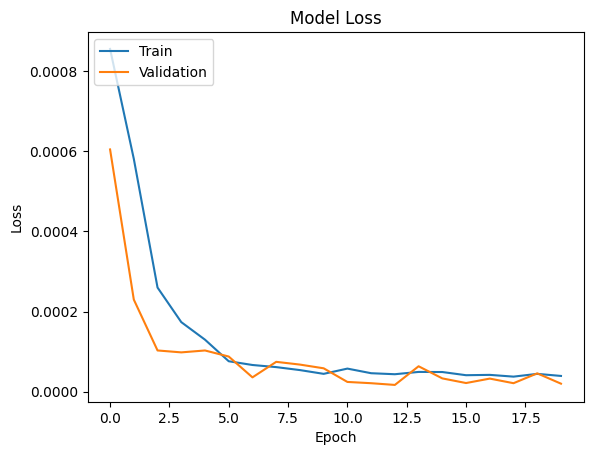

U-shaped graph saved at: unet_1.png


In [26]:
unet = experiment.get_model()

unet.plot_loss()

unet.summary(graph=True, graph_name="unet_1")

In [27]:
df = pd.read_csv('results/UNet.csv')
#df.head(len(df))
#df.describe()
df.iloc[-1]

Experiment number                             2
Name                                      MSE 2
Date                 2023-06-01 14:23:45.837623
Optimizer                                  Adam
Learning rate                             0.001
Loss                           MeanSquaredError
Input shape                       (128, 128, 3)
Output shape                      (128, 128, 1)
Filters                          [64, 128, 256]
Dropout                                     0.2
Epochs                                       20
Batch size                                    1
Test SSIM                              0.993867
Test PSNR                             47.177925
Test MSE                               0.000019
Name: 1, dtype: object

1/1 [==============================] - 0s 150ms/step


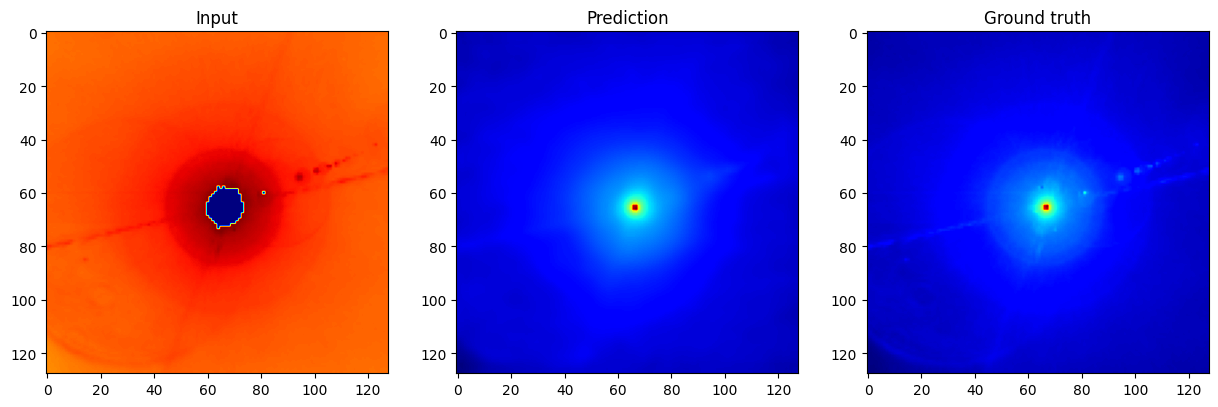

1/1 [==============================] - 0s 24ms/step


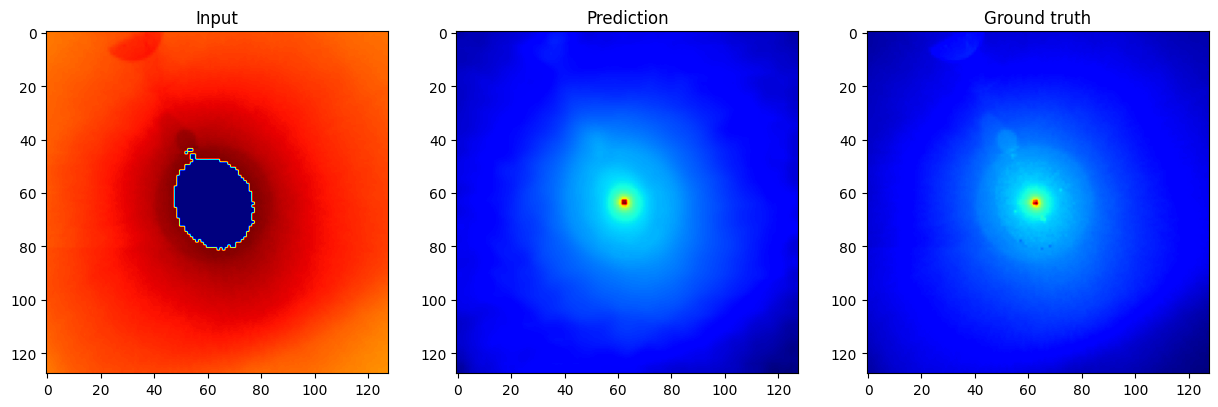

1/1 [==============================] - 0s 24ms/step


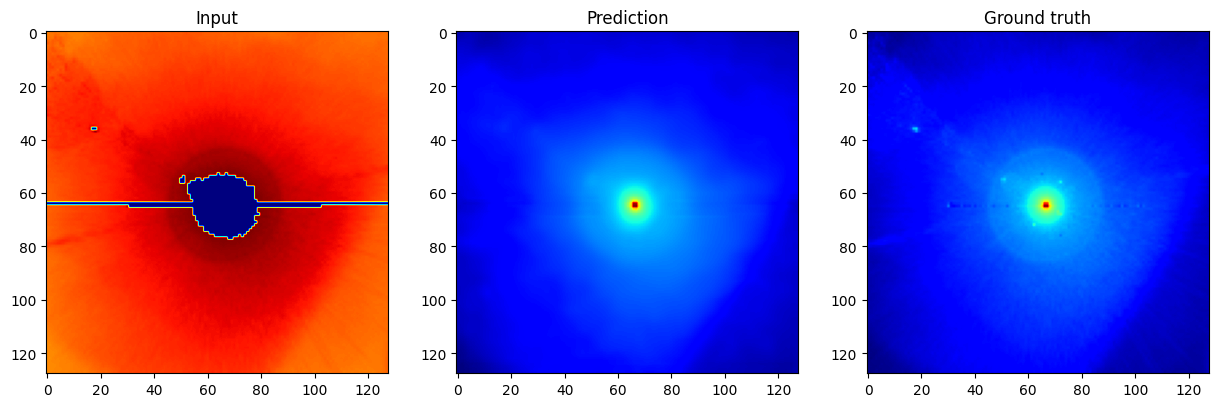

In [28]:
n = 3
for i in range(n):
    ind = random.randint(0, X_test.shape[0]-1)
    pred = unet.predict(X_test[ind:ind+1])
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(X_test[ind,:,:,2], cmap='jet')
    axs[0].set_title('Input')
    axs[1].imshow(pred[0,:,:], cmap='jet')
    axs[1].set_title('Prediction')
    axs[2].imshow(y_test[ind,:,:], cmap='jet')
    axs[2].set_title('Ground truth')
    plt.show()